# TO TRANSFER A VOCAL-ONLY AUDIO CLIP TO A UST FILE

Jan 21, 2022, *By Github: @ME-MAFIA*

## Part 0 : Preprocessing

In the part, the given audio in wav form is expected to be transferred to arrays with a sampling rate of 16000 Hz.

IMPORT THE NEEDED PACKAGES

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import speech_recognition as spr
print(spr.__version__)
import numpy as np
import librosa as lb
from librosa import display, feature, beat
import utaupy as utp
import playsound
import pylab
import tensorflow as tf
print(tf.__version__)

3.8.1
2.8.0


LOAD THE AUDIO FILE

120


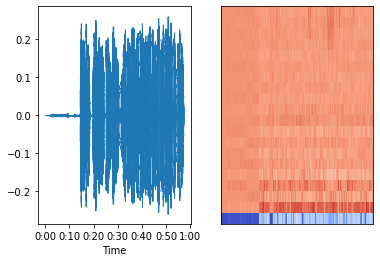

In [4]:
from preprocess import load_vocal_in, vocal_cut
carol, carol_sr, carol_mfcc = load_vocal_in('untitled.wav')
song, song_sr = lb.load('song.wav', sr = None)
carol = lb.resample(carol, carol_sr, 16000)
carol_sr = 16000
carol_tempo = int(beat.tempo(song, song_sr))
print(carol_tempo)

array_carol = vocal_cut(carol)
plt.subplot(1, 2, 1)
display.waveshow(carol, carol_sr)
plt.subplot(1, 2, 2)
display.specshow(carol_mfcc)


In [ ]:
from random import randint 
a = randint(0, carol.shape[0] - 10)


## Part 1: Find the parameters: pronunciation, pitch & tunes

### 1 - 0: Speech Recognition - Find the lyrics and corresponding times


In [5]:
import time
import librosa
import librosa.display 
from dtw import dtw
from scipy.spatial.distance import cdist

In [6]:
help(dtw)

Help on function dtw in module dtw.dtw:

dtw(x, y, dist, warp=1, w=inf, s=1.0)
    Computes Dynamic Time Warping (DTW) of two sequences.
    
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    :param int w: window size limiting the maximal distance between indices of matched entries |i,j|.
    :param float s: weight applied on off-diagonal moves of the path. As s gets larger, the warping path is increasingly biased towards the diagonal
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.



### 1 - 1 The MIDI Produced from the Audio

In this section, a MIDI file, without the variation of pitch in each note is expected to be produced from the audio.

In [6]:
print(array_carol.shape[0])
from preprocess import find_pitch
pitch = find_pitch(array_carol)
print(pitch)

5736
[0. 0. 0. ... 0. 0. 0.]
